![title](신천지.jpg)

#### 안녕하세요. _‘기술의 물결을 선도하다.’_ TAVE팀입니다.

코로나바이러스감염증-19가 중국에서 처음 발생한 이후 한국에서는 1월 20일 첫 번째 확진자가 발생하고 2월 16일까지 30명의 확진자가 발생하였습니다. 확진자 증가 추세가 하루에 1~2명 수준이고 확진자의 동선 정보도 신속히 공개되었습니다. 게다가 당시 소수의 확진자는 수도권 지방 위주로 발생하고 있었고 대구광역시와 경상북도 지방은 표면상으로는 1명의 확진자도 발생하지 않은 지역이었습니다. **그러나 2월 18일 31번째 확진자가 나타나면서 상황은 급변하게 됩니다.**

신천지 신도로 밝혀진 31번 환자는 증상이 있었으나 의료진의 검사 제안에 응하지 않고 교회 예배를 갔음이 확인되었습니다. 그리고 바로 다음 날 20명의 추가 확진자가 발생하면서 대구 경북 지역의 신천지 교인을 중심으로 대량 확진자가 발생하기 시작하였습니다. 이로 인해 30명에서 소강 상태였던 확진자 수가 수백 배로 치솟았으며, 이탈리아를 시작으로 유럽, 아메리카의 확진자가 폭발하기 시작한 3월 10일 이전까지는 확진자 수 순위가 중국에 이은 **세계 2위**, 인구 수 대비로는 **세계 1위**까지 올라가기도 했습니다.

종교 단체의 특성상 모임이 정기성을 띠고 다양한 지역에 분포해 있어 통제가 어렵기 때문에, 이러한 국가재난급 감염병 사태에서 한 종교단체의 비협조적 행동은 해당 단체의 교인 뿐만 아니라 전국민에게 기하급수적인 전파로 이어질 수 있습니다. 따라서, 대한민국은 이번 사태를 계기로 **대형 단체의 활동이 심각한 수준의 집단 감염을 불러일으킬 수 있음에 경각심을 가지고, 감염병의 대거 확산을 방지하기 위한 대비를 해야할 것입니다.**

저희는 코로나바이러스감염증-19 사태에서,

**<span style="color:purple">A. 신천지 교인 집단감염이 감염병 확산에 얼마나 파급력이 컸는지</span>**

**<span style="color:purple">B. 신천지 교인 집단감염이라는 변수가 없었다면 상황이 어떻게 달라졌을지</span>**

**<span style="color:purple">C. 비협조적 종교집단을 제외한 감염병 사태에서는 어떤 변수에 경각심을 가져야 할 지</span>**

**<span style="color:purple">D. 미래에 다시 종교단체 집단감염 사태가 발생했을 때를 대비해 어떤 정책과 매뉴얼을 수립해야 하는 지</span>**

에 대한 인사이트를 얻기 위해 이번 프로젝트를 기획했습니다.

# 인사이트 도출 단계
**STEP 1.** Case, PatientInfo, PatientRoute, Time, TimeProvince 데이터에서 “신천지 교회 관련 확진자”가 어느정도의 비중을 차지하고 있는 지 파악

**STEP 2.** Case, PatientInfo, PatientRoute, Time, TimeProvince 데이터에서 “신천지 교회 관련 확진자” 데이터 제거

**STEP 3.** 신천지 교회 관련 확진자를 제거한 데이터와 원본 데이터를 같은 방식으로 시각화하여(plot.ly 이용) 확산 양상 비교

**STEP 4.** 신천지 교회 관련 확진자를 제거한 데이터의 시각화를 통해 경각심을 가져야 할 변수에 대한 인사이트 도출

## _STEP 1. 신천지 관련 확진자의 비중은 어느 정도일까?_
우선 가장 먼저, 제공받은 데이터 상에서 신천지 교회 관련 확진자가 어느 정도의 비중을 차지하고 있는지 파악해보았습니다. 아래의 분석은 **4월 20일** 업데이트 된 데이터를 기준으로 하였습니다.

In [69]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import plotly.express as px
import plotly.graph_objects as go

from datetime import date, timedelta

import plotly.offline as py

import folium 
from folium import plugins

import warnings
warnings.filterwarnings("ignore")

In [70]:
case = pd.read_csv('Case.csv')
time = pd.read_csv('Time.csv')
timeprovince = pd.read_csv('TimeProvince.csv')
patient = pd.read_csv('PatientInfo.csv')
patientroute = pd.read_csv('PatientRoute.csv')

### <전체 확진자 대비 신천지 관련 확진자 비율> _Case.csv 활용

In [71]:
#확진자 수가 50명 이상인 데이터
case50 = case[case['confirmed'] >= 50]
#확진자 수가 50명 이상인 감염경로 파악
case50 = pd.DataFrame(case50.groupby(['infection_case'])['confirmed'].max())
case50 = case50.sort_values(by=['confirmed'], ascending=False)
#주요 감염경로 비율 시각화
fig = px.pie(case50, values='confirmed', names= case50.index, title='주요 감염경로')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

보시다시피 신천지 관련 감염은 전체 감염 경로 중 60.8%로 가장 큰 비중을 차지하고 있습니다.

### <일자별 신천지 누적 확진자 수 확인> _Time.csv 활용

그렇다면 신천지 관련 확진자는 어떤 양상으로 증가했을까요? 저희는 [질병관리본부](https://www.cdc.go.kr/board/board.es?mid=a20501000000&bid=0015&act=view&list_no=366474)에서 매일 발표한 정례브리핑을 참고하여, 일자별/지역별 신천지 관련 누적 확진자 수 데이터프레임을 별도 구축했습니다.

In [72]:
shin_province = pd.read_csv('신천지 지역별 누적.csv')
shin_province.rename(columns = {'Unnamed: 0' : '날짜'}, inplace=True)
shin_province = shin_province.set_index('날짜')
shin_province = shin_province.reset_index()
shin_province

,날짜,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,누적 합계
0,2020/1/20,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0
1,2020/1/21,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0
2,2020/1/22,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0
3,2020/1/23,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0
4,2020/1/24,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2020/4/16,8,12,4509.0,2,9,2,16.0,1.0,29.0,17.0,6.0,0,1,1,566.0,32.0,0,5211
88,2020/4/17,8,12,4509.0,2,9,2,16.0,1.0,29.0,17.0,6.0,0,1,1,566.0,32.0,0,5211
89,2020/4/18,8,12,4509.0,2,9,2,16.0,1.0,29.0,17.0,6.0,0,1,1,566.0,33.0,0,5212
90,2020/4/19,8,12,4510.0,2,9,2,16.0,1.0,29.0,17.0,6.0,0,1,1,566.0,32.0,0,5212


In [73]:
#time데이터에 날짜별 누적 신천지 관련 확진자 수 데이터 추가
time['shin'] = shin_province['누적 합계'].values
#날짜별 신천지 관련 누적 확진자 line 그래프 시각화
fig = go.Figure()
fig.add_trace(go.Line(x=time.date, y=time.shin, mode='lines', name='신천지 관련 누적 확진자 추이'))
fig.add_trace(go.Line(x=time.date, y=time.confirmed, mode='lines', name='전체 누적 확진자 추이'))

## _STEP 2. 각 데이터에서 신천지 교회 관련 확진자 데이터 제거하기_
대규모 집단 감염이었던 신천지 관련 확진자 데이터를 제외하면 어떤 차이가 있을지를 알아보기 위해, 신천지 관련 확진자를 선별할 수 있는 데이터셋에서 해당 데이터를 제거해보았습니다.


각 data에서 저희가 신천지 교회 관련 확진자 데이터로 잡은 기준은 아래와 같습니다.

**Case**: 감염경로(infection_case)가 신천지(Shincheonji Church)인 데이터

**PatientInfo**: 감염경로(infection_case)가 신천지(Shincheonji Church)인 데이터(1차 감염자) + 앞서 신천지 관련 1차 감염자와의 접촉을 통해 감염된 2차 감염자 + (같은 방식으로) 3차, 4차, 5차 감염자 데이터

**PatientRoute**: PatientInfo에서 얻은 신천지 관련 확진자의 patient_id에 해당하는 데이터

**Time**: 질병관리본부에서 매일 발표한 정례브리핑을 참고하여, 일자별 신천지 관련 누적 확진자 수 데이터프레임 별도 구축

**TimeProvince**: 질병관리본부에서 매일 발표한 정례브리핑을 참고하여, 일자별 신천지 관련 지역별 누적 확진자 수 데이터프레임 별도 구축

## **Case**

In [74]:
# infection_case가 신천지 교회('Shincheonji Church)가 아닌 데이터만 추출
non_shin = case['infection_case'] != 'Shincheonji Church'
case_non_shin = case[non_shin].reset_index(drop = True)
case_non_shin

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
...,...,...,...,...,...,...,...,...
92,6100009,Gyeongsangnam-do,-,False,contact with patient,6,-,-
93,6100010,Gyeongsangnam-do,-,False,etc,18,-,-
94,7000001,Jeju-do,-,False,overseas inflow,9,-,-
95,7000002,Jeju-do,-,False,contact with patient,0,-,-


## **Time**

In [75]:
#time데이터에 날짜별 누적 신천지 관련/비관련 확진자 수 데이터 추가 (앞서 준비한 데이터프레임, shin_province 활용)
time['nonshin'] = time['confirmed']-shin_province['누적 합계'].values
time

,date,time,test,negative,confirmed,released,deceased,shin,nonshin
0,2020-01-20,16,1,0,1,0,0,0,1
1,2020-01-21,16,1,0,1,0,0,0,1
2,2020-01-22,16,4,3,1,0,0,0,1
3,2020-01-23,16,22,21,1,0,0,0,1
4,2020-01-24,16,27,25,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...
87,2020-04-16,0,538775,513894,10613,7757,229,5211,5402
88,2020-04-17,0,546463,521642,10635,7829,230,5211,5424
89,2020-04-18,0,554834,530631,10653,7937,232,5212,5441
90,2020-04-19,0,559109,536205,10661,8042,234,5212,5449


## **TimeProvince**

In [76]:
#TimeProvince의 'confirmed' 데이터만을 가져와 각 지역명이 컬럼이 되도록 변경하기
province_conf=timeprovince.set_index(['province', 'date']).unstack('province').drop(['time','deceased','released'],axis=1)
province_conf.columns = ['부산','충북','충남','대구','대전','강원','광주','경기','경북','경남','인천','제주','전북','전남','세종','서울','울산']
province_conf

,부산,충북,충남,대구,대전,강원,광주,경기,경북,경남,인천,제주,전북,전남,세종,서울,울산
date,,,,,,,,,,,,,,,,,
2020-01-20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-21,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-22,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-16,130,45,139,6827,39,52,28,649,1352,115,88,13,17,15,46,619,42
2020-04-17,130,45,139,6827,40,52,30,650,1356,115,89,13,17,15,46,621,42
2020-04-18,130,45,141,6830,39,53,30,654,1358,116,90,13,17,15,46,622,42


In [77]:
timeprovince_confirmed = province_conf[['서울','부산','대구','인천','광주','대전','울산','세종','경기','강원','충북','충남','전북','전남','경북','경남','제주']]
timeprovince_confirmed.index.name = '날짜'
timeprovince_confirmed

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
날짜,,,,,,,,,,,,,,,,,
2020-01-20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-22,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-16,619,130,6827,88,28,39,42,46,649,52,45,139,17,15,1352,115,13
2020-04-17,621,130,6827,89,30,40,42,46,650,52,45,139,17,15,1356,115,13
2020-04-18,622,130,6830,90,30,39,42,46,654,53,45,141,17,15,1358,116,13


In [78]:
timeprovince_confirmed.to_csv('TimeProvince_confirmed.csv')

In [79]:
# 위에서 TimeProvince 데이터를 shin_province와 같은 형식으로 바꾼 timeprovince_confirmed 불러오기
time_province_change = pd.read_csv('TimeProvince_confirmed.csv')
#timeprovince_confirmed 데이터에서 shin_province 데이터 빼기 (신천지를 제외한 TimeProvince 확진자 데이터 생성)
time_province_non_shin = time_province_change[['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']] - shin_province[['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']]
time_province_non_shin['날짜'] = time_province_change['날짜']
time_province_non_shin = time_province_non_shin.set_index('날짜').reset_index()
time_province_non_shin

,날짜,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,2020-01-20,0,0,0.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0
1,2020-01-21,0,0,0.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0
2,2020-01-22,0,0,0.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0
3,2020-01-23,0,0,0.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0
4,2020-01-24,0,0,0.0,1,0,0,0.0,0.0,1.0,0.0,0.0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2020-04-16,611,118,2318.0,86,19,37,26.0,45.0,620.0,35.0,39.0,139,16,14,786.0,83.0,13
88,2020-04-17,613,118,2318.0,87,21,38,26.0,45.0,621.0,35.0,39.0,139,16,14,790.0,83.0,13
89,2020-04-18,614,118,2321.0,88,21,37,26.0,45.0,625.0,36.0,39.0,141,16,14,792.0,83.0,13
90,2020-04-19,616,118,2322.0,89,21,37,26.0,45.0,625.0,36.0,39.0,141,16,14,793.0,84.0,13


## **PatientInfo**

PatientInfo에서는 우선 감염 경로가 신천지 교회('Shincheonji Church')로 명시되어 있는 환자와, 해당 환자와의 접촉으로 발생한 n차 감염자까지 추적하여 신천지 관련 확진자로 삼아 제거했습니다. 감염 경로가 '신천지 교회'로 명시되지 않은 환자까지도 추적한 것은, 저희는 최대한 '신천지 교회에서 발생한 집단 감염이 없었다면' 어땠을지에 대한 인사이트를 도출하여 앞으로의 대비책에 대해 생각해보고자 하였기 때문입니다. 

In [80]:
#감염경로 'Shincheonji Church'인 확진자 patient_id
shin =list(patient.patient_id[patient.infection_case == 'Shincheonji Church'])


In [81]:
#신천지 확진자로 인한 2차 감염자 patient_id
a = []
for i in shin:
    a += list(patient[patient.infected_by == i]['patient_id'])
a

[2000000048,
 2000000105,
 2000000137,
 1000000064,
 1100000079,
 1200000033,
 1200000047,
 1200000048,
 1200000049,
 1200000050,
 1200000051,
 1500000015,
 1600000005,
 2000000013,
 2000000015,
 2000000028,
 2000000050,
 6001000001,
 6002000014,
 6002000015,
 6002000016,
 6100000008,
 1600000006,
 1600000012,
 2000000049,
 2000000061,
 2000000069,
 6006000022,
 6011000045,
 6100000057,
 6100000046,
 6100000040,
 6100000058,
 6100000041,
 6100000051]

In [82]:
#신천지 확진자로 인한 3차 감염자 patient_id
b = []
for i in a:
    b += list(patient[patient.infected_by== i]['patient_id'])
b

[2000000146,
 1600000006,
 2000000014,
 2000000027,
 2000000021,
 2000000023,
 2000000051,
 2000000073,
 2000000093,
 2000000096,
 2000000097]

In [83]:
#신천지 확진자로 인한 4차 감염자 patient_id
c = []
for i in b:
    c += list(patient[patient.infected_by== i]['patient_id'])
c

[2000000350, 2000000104]

In [84]:
#신천지 확진자로 인한 5차 감염자 patient_id
d = []
for i in c:
    d += list(patient[patient.infected_by== i]['patient_id'])
d

[2000000107, 2000000108, 2000000109, 2000000284]

In [85]:
#6차 감염자 정보 없음
e = []
for i in d:
    e += list(patient[patient.infected_by== i]['patient_id'])
e

[]

In [86]:
#신천지 관련 확진환자 patient_id 하나의 리스트로 결합
byshin = list(set(shin + a+b+c
+d))
#신천지 관련 확진자 총 151명
len(byshin)

151

이렇듯 '신천지 교회'가 감염 경로가 아님에도 불구하고 해당 환자와의 접촉을 통해 감염된 사례는 상당히 많았습니다. 해당 환자들을 모두 제거한 데이터프레임을 아래와 같이 구축하였습니다.

In [87]:
#신천지 관련 확진자를 제외한 데이터
for i in byshin: 
    patient.drop(patient[patient.patient_id == i].index,inplace = True)
patient_non_shin=patient
patient_non_shin

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3322,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3323,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3324,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


다만, PatientInfo의 경우 데이터의 부족으로 **대구, 경북의 신천지 관련 확진자 비율**이 크게 차이가 났습니다. 따라서, **Case** 데이터와 **TimeProvince** 데이터를 활용해 신천지 관련 확진자의 비율이 상당한 두 지역의 **infection case 결측치를 대체**했습니다.

**ㄱ. 대구, 경북에서 신천지로 결측치 대체할 데이터 비율 구하기**

In [88]:
#전체 확진자 수
case.confirmed.sum()

9794

In [89]:
#신천지 관련 확진자 수
case[case.infection_case == 'Shincheonji Church'].confirmed.sum()

5212

In [90]:
#대구 신천지 관련 확진자 / 대구 전체 확진자 -> 66%
shin_province['대구']/time_province_change['대구'] *100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
        ...    
87    66.046580
88    66.046580
89    66.017570
90    66.012881
91    66.003220
Name: 대구, Length: 92, dtype: float64

In [91]:
#경북 신천지 관련 확진자 / 경북 전체 확진자 -> 41.6%
shin_province['경북']/time_province_change['경북'] *100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
        ...    
87    41.863905
88    41.740413
89    41.678940
90    41.648271
91    41.587068
Name: 경북, Length: 92, dtype: float64

**ㄴ. PatientInfo에 비율 적용**

In [92]:
patient = pd.read_csv('PatientInfo.csv')

In [93]:
#PatientInfo 상의 대구 확진자 수
len(patient[patient.province == 'Daegu'])

63

In [94]:
#PatientInfo 상의 대구 신천지 확진자 수
len(patient[patient.province == 'Daegu'][patient.infection_case == 'Shincheonji Church'])

13

In [95]:
#PatientInfo 상에서 추가할 대구 신천지 infection_case -> 29명
63*66/100 - 13

28.58

In [96]:
#PatientInfo 상의 경북 확진자 수
len(patient[patient.province == 'Gyeongsangbuk-do'])

1223

In [97]:
#PatientInfo 상의 경북 신천지 확진자 수 -> 25명
len(patient[patient.province == 'Gyeongsangbuk-do'][patient.infection_case == 'Shincheonji Church'])

25

In [98]:
#PatientInfo 상에서 추가할 경북 신천지 infection_case -> 483명
1223*41.6/100 - 25

483.76800000000003

In [99]:
#대구 29명 nan값 대체
patient_daegu= patient_non_shin[patient_non_shin['province']=='Daegu']
daegu=patient_daegu['infection_case'].fillna(0,limit=29)
patient_daegu['infection_case']=daegu

daegu_idlist = list(patient_daegu[patient_daegu['infection_case'] == 0].patient_id.values)
len(daegu_idlist)

29

In [100]:
for i in daegu_idlist:
    patient_non_shin.drop(patient_non_shin[patient_non_shin.patient_id==i].index,inplace=True)
patient_non_shin

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3322,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3323,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3324,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


In [101]:
#경상북도 483명 nan값 대체
patient_gyb= patient_non_shin[patient_non_shin['province']=='Gyeongsangbuk-do']
gyb=patient_gyb['infection_case'].fillna(0,limit=483)
patient_gyb['infection_case']=gyb

gyb_idlist = list(patient_gyb[patient_gyb['infection_case'] == 0].patient_id.values)
len(gyb_idlist)

483

In [102]:
for i in gyb_idlist:
    patient_non_shin.drop(patient_non_shin[patient_non_shin.patient_id==i].index,inplace=True)
patient_non_shin

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3322,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3323,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3324,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


## **PatientRoute**

 앞서 byshin이라는 변수에 신천지 관련 환자의 patient_id를 모두 저장해두었습니다. PatientRoute에 명시된 patient_id 정보를 byshin의 데이터와 비교하여 제거했습니다.

In [103]:
for i in byshin:
    patientroute.drop(patientroute[patientroute.patient_id== i].index, inplace =True)
patientroute_non_shin = patientroute
patientroute_non_shin

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534
...,...,...,...,...,...,...,...,...
5958,6100000090,NaN,2020-03-24,Seoul,Gangseo-gu,airport,37.558654,126.794474
5959,6100000090,NaN,2020-03-24,Busan,Gangseo-gu,airport,35.173220,128.946459
5960,6100000090,NaN,2020-03-25,Gyeongsangnam-do,Yangsan-si,store,35.336944,129.026389
5961,6100000090,NaN,2020-03-25,Gyeongsangnam-do,Yangsan-si,hospital,35.335757,129.025003


## _STEP 3. 데이터 시각화 (원본 데이터와 non_shin 데이터 비교)_

그렇게 신천지 관련 확진자의 데이터를 모두 제거하였습니다. 다음으로는 해당 데이터를 기존의 데이터(신천지 관련 확진자를 포함한)와 함께 시각화하여 비교해보겠습니다. 저희는 아래와 같은 항목으로 나누어 앞서 저희가 가공한 데이터를 통해 다양한 각도에서 두 경우의 차이를 알아보고자 하였습니다.

1) **확진자 주요 발생 도시 및 동선**

2) **주요 감염 경로**

3) **연령대별 확진자/접촉자 수**

4) **날짜별 확진자 수 추이**

## **1. 확진자 주요 발생 도시 및 동선**

신천지 관련 확진자를 제외했을 때와 포함했을 때, 확진자 주요 발생 도시가 어떻게 변화하는지 살펴보았습니다.

**ㄱ. 확진자 주요 발생 도시**

In [104]:
#patientinfo 데이터 활용
city = patient['city'].value_counts()
city = pd.DataFrame(city)
city = city.reset_index()
city = city[city['city'] > 50]
city = city.set_index('index')

fig = px.pie(city, values='city', names=city.index, title='patient')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

신천지를 포함한 데이터에서 가장 많은 확진자가 발생한 도시는 경상북도 경산시였습니다. 실제로 [신도들에 대한 전수조사 결과, 경상북도 내의 코로나19 확진자의 65%가 경산시에 거주하고 있다고 드러난 바 있습니다.](https://www.yna.co.kr/view/AKR20200311047800053) 위의 파이차트에서 오른쪽에 위치한 범례 중 '경산시(Gyeongsan-si)'를 클릭하면 경산시를 제외한 비율을 확인할 수 있습니다. 이는 바로 뒤에 이어지는 신천지 비관련 확진자들의 데이터로만 생성된 파이차트와 아주 유사한 모습을 보인다는 것을 확인할 수 있으실 겁니다.


In [105]:
city = patient_non_shin['city'].value_counts()
city = pd.DataFrame(city)
city = city.reset_index()
city = city[city['city'] > 50]
city = city.set_index('index')

fig = px.pie(city, values='city', names=city.index, title='patient_non_shin')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

**ㄴ. 날짜별/지역별 확진자 발생 추이**

In [106]:
#timeprovince 데이터 활용
#신천지 제외 데이터(_x), 신천지 포함 데이터(_y) 비교 시각화
merge = pd.merge(time_province_non_shin, time_province_change, on='날짜')
merge.set_index('날짜')
merge = merge[['날짜', '서울_x', '서울_y', '부산_x', '부산_y', '대구_x', '대구_y', '인천_x', '인천_y', '광주_x', '광주_y', '대전_x', '대전_y', '울산_x', '울산_y', '세종_x', '세종_y', '경기_x', '경기_y', '강원_x', '강원_y', '충북_x', '충북_y', '충남_x', '충남_y','전북_x', '전북_y', '전남_x', '전남_y', '경북_x', '경북_y', '경남_x', '경남_y', '제주_x', '제주_y']]
merge = pd.DataFrame(merge.set_index('날짜').stack())
merge = merge.reset_index()
merge.columns = ['date', 'province', 'confirmed']
merge

,date,province,confirmed
0,2020-01-20,서울_x,0.0
1,2020-01-20,서울_y,0.0
2,2020-01-20,부산_x,0.0
3,2020-01-20,부산_y,0.0
4,2020-01-20,대구_x,0.0
...,...,...,...
3115,2020-04-20,경북_y,1361.0
3116,2020-04-20,경남_x,84.0
3117,2020-04-20,경남_y,116.0
3118,2020-04-20,제주_x,13.0


In [107]:
fig = px.bar(merge, x="province", y="confirmed", color="province",
    animation_frame="date", animation_group="province", range_y=[0,8000])
fig.show()

위의 그래프에서 '(지역명) x'는 신천지 관련 확진자를 제외한 데이터, '(지역명) y'는 포함한 데이터입니다. 날짜별로 확진자 증가에 있어 어떻게 다른 양상을 보였을지 확인할 수 있습니다. 예상한대로, 대구와 경북은 두 데이터 간의 차이가 매우 컸고, 다른 지역은 신천지의 유무에 따른 확진자 증감이 크지 않았습니다. 특히, 신천지 관련 집단 감염이 발생한 이후 수도권 거주 신천지 교인을 통한 집단 감염에 대한 우려가 컸던 것과 달리, 수도권은 신천지 집단 감염에 크게 영향받지 않았음을 알 수 있었습니다.

**ㄹ. 가장 많이 돌아다닌 확진자 5명의 동선**

In [110]:
#PatientRoute 원본
patientroute = pd.read_csv('PatientRoute.csv')
patientroute['patient_id'].value_counts()

3009000014    42
1400000021    38
3009000013    37
1100000069    35
3009000003    33
              ..
1000000611     1
1000000607     1
1100000068     1
1000000340     1
1100000017     1
Name: patient_id, Length: 1109, dtype: int64

In [111]:
#1번째
routemax1=patientroute[patientroute['patient_id']==3009000014]
routemax1=routemax1.reset_index(drop=True)

#2번째
routemax2=patientroute[patientroute['patient_id']==1400000021]
routemax2=routemax2.reset_index(drop=True)

#3번째
routemax3=patientroute[patientroute['patient_id']==3009000013]
routemax3=routemax3.reset_index(drop=True)

#4번째
routemax4=patientroute[patientroute['patient_id']==1100000069]
routemax4=routemax4.reset_index(drop=True)

#5번째
routemax5=patientroute[patientroute['patient_id']==3009000003]
routemax5=routemax5.reset_index(drop=True)

In [112]:
#1번째
color1='red'
map = folium.Map(location=[routemax1['latitude'].mean(), routemax1['longitude'].mean()], zoom_start=7)

for n in routemax1.index:
    folium.Marker(location=[routemax1.loc[n, 'latitude'], routemax1.loc[n, 'longitude']],popup=routemax1.loc[n, 'date']+" : "+
                 routemax1.loc[n, 'province']+","+routemax1.loc[n, 'city'],icon=folium.Icon(color1)).add_to(map)
    
lists = []
for n in routemax1.index:
    points = (routemax1.loc[n, 'latitude'], routemax1.loc[n, 'longitude'])
    lists.append(points)
    
folium.PolyLine(lists,color='red').add_to(map)

#2번째
color2='orange'

for n in routemax2.index:
    folium.Marker(location=[routemax2.loc[n, 'latitude'], routemax2.loc[n, 'longitude']],popup=routemax2.loc[n, 'date']+" : "+
                 routemax2.loc[n, 'province']+","+routemax2.loc[n, 'city'],icon=folium.Icon(color2)).add_to(map)
    
lists = []
for n in routemax2.index:
    points = (routemax2.loc[n, 'latitude'], routemax2.loc[n, 'longitude'])
    lists.append(points)
    
folium.PolyLine(lists,color='darkorange').add_to(map)

#3번째
color3='blue'
for n in routemax3.index:
    folium.Marker(location=[routemax3.loc[n, 'latitude'], routemax3.loc[n, 'longitude']],popup=routemax3.loc[n, 'date']+" : "+
                 routemax3.loc[n, 'province']+","+routemax3.loc[n, 'city'],icon=folium.Icon(color3)).add_to(map)
    
lists = []
for n in routemax3.index:
    points = (routemax3.loc[n, 'latitude'], routemax3.loc[n, 'longitude'])
    lists.append(points)
    
folium.PolyLine(lists,color='blue').add_to(map)

#4번째
color4='black'
for n in routemax4.index:
    folium.Marker(location=[routemax4.loc[n, 'latitude'], routemax4.loc[n, 'longitude']],popup=routemax4.loc[n, 'date']+" : "+
                 routemax4.loc[n, 'province']+","+routemax4.loc[n, 'city'],icon=folium.Icon(color4)).add_to(map)
    
lists = []
for n in routemax4.index:
    points = (routemax4.loc[n, 'latitude'], routemax4.loc[n, 'longitude'])
    lists.append(points)
    
folium.PolyLine(lists,color='black').add_to(map)

#5번째
color5='green'

for n in routemax5.index:
    folium.Marker(location=[routemax5.loc[n, 'latitude'], routemax5.loc[n, 'longitude']],popup=routemax5.loc[n, 'date']+" : "+
                 routemax5.loc[n, 'province']+","+routemax5.loc[n, 'city'],icon=folium.Icon(color5)).add_to(map)
    
lists = []
for n in routemax5.index:
    points = (routemax5.loc[n, 'latitude'], routemax5.loc[n, 'longitude'])
    lists.append(points)
    
folium.PolyLine(lists,color='green').add_to(map)

map.save('patient_route_five_people.html')
map

In [113]:
#patientroute_non_shin
patientroute_non_shin['patient_id'].value_counts()

1400000021    38
3009000013    37
1100000069    35
6004000016    32
4100000013    31
              ..
6001000039     1
1100000006     1
6100000081     1
1000000426     1
1100000017     1
Name: patient_id, Length: 1039, dtype: int64

In [114]:
#1번째
routemax1=patientroute[patientroute['patient_id']==1400000021]
routemax1=routemax1.reset_index(drop=True)

#2번째
routemax2=patientroute[patientroute['patient_id']==3009000013]
routemax2=routemax2.reset_index(drop=True)

#3번째
routemax3=patientroute[patientroute['patient_id']==1100000069]
routemax3=routemax3.reset_index(drop=True)

#4번째
routemax4=patientroute[patientroute['patient_id']==6004000016]
routemax4=routemax4.reset_index(drop=True)

#5번째
routemax5=patientroute[patientroute['patient_id']==4100000013]
routemax5=routemax5.reset_index(drop=True)

In [115]:
#1번째
color1='red'
map = folium.Map(location=[routemax1['latitude'].mean(), routemax1['longitude'].mean()], zoom_start=7)

for n in routemax1.index:
    folium.Marker(location=[routemax1.loc[n, 'latitude'], routemax1.loc[n, 'longitude']],popup=routemax1.loc[n, 'date']+" : "+
                 routemax1.loc[n, 'province']+","+routemax1.loc[n, 'city'],icon=folium.Icon(color1)).add_to(map)
    
lists = []
for n in routemax1.index:
    points = (routemax1.loc[n, 'latitude'], routemax1.loc[n, 'longitude'])
    lists.append(points)
    
folium.PolyLine(lists,color='red').add_to(map)

#2번째
color2='orange'

for n in routemax2.index:
    folium.Marker(location=[routemax2.loc[n, 'latitude'], routemax2.loc[n, 'longitude']],popup=routemax2.loc[n, 'date']+" : "+
                 routemax2.loc[n, 'province']+","+routemax2.loc[n, 'city'],icon=folium.Icon(color2)).add_to(map)
    
lists = []
for n in routemax2.index:
    points = (routemax2.loc[n, 'latitude'], routemax2.loc[n, 'longitude'])
    lists.append(points)
    
folium.PolyLine(lists,color='darkorange').add_to(map)

#3번째
color3='blue'
for n in routemax3.index:
    folium.Marker(location=[routemax3.loc[n, 'latitude'], routemax3.loc[n, 'longitude']],popup=routemax3.loc[n, 'date']+" : "+
                 routemax3.loc[n, 'province']+","+routemax3.loc[n, 'city'],icon=folium.Icon(color3)).add_to(map)
    
lists = []
for n in routemax3.index:
    points = (routemax3.loc[n, 'latitude'], routemax3.loc[n, 'longitude'])
    lists.append(points)
    
folium.PolyLine(lists,color='blue').add_to(map)

#4번째
color4='black'
for n in routemax4.index:
    folium.Marker(location=[routemax4.loc[n, 'latitude'], routemax4.loc[n, 'longitude']],popup=routemax4.loc[n, 'date']+" : "+
                 routemax4.loc[n, 'province']+","+routemax4.loc[n, 'city'],icon=folium.Icon(color4)).add_to(map)
    
lists = []
for n in routemax4.index:
    points = (routemax4.loc[n, 'latitude'], routemax4.loc[n, 'longitude'])
    lists.append(points)
    
folium.PolyLine(lists,color='black').add_to(map)

#5번째
color5='green'

for n in routemax5.index:
    folium.Marker(location=[routemax5.loc[n, 'latitude'], routemax5.loc[n, 'longitude']],popup=routemax5.loc[n, 'date']+" : "+
                 routemax5.loc[n, 'province']+","+routemax5.loc[n, 'city'],icon=folium.Icon(color5)).add_to(map)
    
lists = []
for n in routemax5.index:
    points = (routemax5.loc[n, 'latitude'], routemax5.loc[n, 'longitude'])
    lists.append(points)
    
folium.PolyLine(lists,color='green').add_to(map)

map.save('patient_route_non_shin_five_people.html')
map

가장 많이 돌아다닌 확진자 5명의 동선을 분석해본 결과, 신천지를 포함한 patientroute에서는 **인천, 원주, 대구, 부산** 지역이 나왔고 신천지를 제외한 patientroute_non_shin에서는 **인천, 천안, 구미, 부산**이 나왔습니다. 공통적으로 나타난 인천, 부산을 제외하면 원본 데이터에서는 **원주와 대구**, 신천지 관련 확진자를 제거한 데이터에서는 **천안과 구미**가 주요 동선으로 파악되었습니다.

이는 앞서 확인한 **확진자 주요 발생 도시**와도 일맥상통하는 결과입니다. 신천지를 포함했을 때 대구와 경북 지역의 도시가 많은 비중을 차지했던 것과 달리, 신천지 관련 데이터를 제거했을 때에는 **천안시와 구미시**가 비중이 큰 도시들 중 하나였죠.

## **2. 주요 감염 경로**

신천지 교회를 제외하기 전과 후, 주요 감염 경로의 비율이 어떻게 다른지 확인해보겠습니다.

In [116]:
#확진자 수가 50명 이상인 데이터
case50 = case[case['confirmed'] >= 50]
#확진자 수가 50명 이상인 감염경로 파악
case50 = pd.DataFrame(case50.groupby(['infection_case'])['confirmed'].max())
case50 = case50.sort_values(by=['confirmed'], ascending=False)
#주요 감염경로 비율 시각화
fig = px.pie(case50, values='confirmed', names= case50.index, title='case')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [117]:
#확진자 수가 50명 이상인 데이터
case50 = case_non_shin[case_non_shin['confirmed'] >= 50]
#확진자 수가 50명 이상인 감염경로 파악
case50 = pd.DataFrame(case50.groupby(['infection_case'])['confirmed'].max())
case50 = case50.sort_values(by=['confirmed'], ascending=False)
#주요 감염경로 비율 시각화
fig = px.pie(case50, values='confirmed', names= case50.index, title='case_non_shin')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [118]:
# 신천지 포함했을 때 개인 접촉과 집단 감염으로 인한 확진 비율
case[case.group==True].confirmed.sum() / case[case.infection_case=='contact with patient'].confirmed.sum()

5.471774193548387

In [119]:
# 신천지 제외했을 때 개인 접촉과 집단 감염으로 인한 확진 비율
case_non_shin[case_non_shin.group==True].confirmed.sum() / case_non_shin[case_non_shin.infection_case=='contact with patient'].confirmed.sum()

1.2685483870967742

In [120]:
#집단감염 여부에 따른 확진자 비율
case_group = pd.DataFrame(case.groupby(['group'])['confirmed'].sum())
case_non_shin_group = pd.DataFrame(case_non_shin.groupby(['group'])['confirmed'].sum())

merge = pd.merge(case_group, case_non_shin_group, on='group')

merge['case'] = merge['confirmed_x'] / case['confirmed'].sum() * 100
merge['case_non_shin'] = merge['confirmed_y'] / case_non_shin['confirmed'].sum() * 100

del merge['confirmed_x']
del merge['confirmed_y']

merge

,case,case_non_shin
group,,
False,30.722892,65.670013
True,69.277108,34.329987


## **3. 연령대별 확진자/접촉자 수**

PatientInfo에서 얻을 수 있는 age 정보를 활용하여 신천지 포함/미포함의 경우 각각 연령대별 확진자와 접촉자 수가 어떻게 다른지 확인해보았습니다.

**ㄱ. 연령대별 확진자 수**

In [122]:
patient_age = patient_non_shin[['patient_id', 'age', 'confirmed_date']].sort_values(by = 'confirmed_date').dropna(subset=['confirmed_date']).reset_index(drop=True)

patient_age['number']=range(0,2660)
patient_age['0s'] = patient_age['number'].apply(lambda x : patient_age.age.iloc[: x].value_counts()['0s'] if '0s' in patient_age.age.iloc[: x].value_counts() else 0)
patient_age['10s'] = patient_age['number'].apply(lambda x : patient_age.age.iloc[: x].value_counts()['10s'] if '10s' in patient_age.age.iloc[: x].value_counts() else 0)
patient_age['20s'] = patient_age['number'].apply(lambda x : patient_age.age.iloc[: x].value_counts()['20s'] if '20s' in patient_age.age.iloc[: x].value_counts() else 0)
patient_age['30s'] = patient_age['number'].apply(lambda x : patient_age.age.iloc[: x].value_counts()['30s'] if '30s' in patient_age.age.iloc[: x].value_counts() else 0)
patient_age['40s'] = patient_age['number'].apply(lambda x : patient_age.age.iloc[: x].value_counts()['40s'] if '40s' in patient_age.age.iloc[: x].value_counts() else 0)
patient_age['50s'] = patient_age['number'].apply(lambda x : patient_age.age.iloc[: x].value_counts()['50s'] if '50s' in patient_age.age.iloc[: x].value_counts() else 0)
patient_age['60s'] = patient_age['number'].apply(lambda x : patient_age.age.iloc[: x].value_counts()['60s'] if '60s' in patient_age.age.iloc[: x].value_counts() else 0)
patient_age['70s'] = patient_age['number'].apply(lambda x : patient_age.age.iloc[: x].value_counts()['70s'] if '70s' in patient_age.age.iloc[: x].value_counts() else 0)
patient_age['80s'] = patient_age['number'].apply(lambda x : patient_age.age.iloc[: x].value_counts()['80s'] if '80s' in patient_age.age.iloc[: x].value_counts() else 0)
patient_age['90s'] = patient_age['number'].apply(lambda x : patient_age.age.iloc[: x].value_counts()['90s'] if '90s' in patient_age.age.iloc[: x].value_counts() else 0)

patient_age

,patient_id,age,confirmed_date,number,0s,10s,20s,30s,40s,50s,60s,70s,80s,90s
0,1400000001,30s,2020-01-20,0,0,0,0,0,0,0,0,0,0,0
1,1000000001,50s,2020-01-23,1,0,0,0,1,0,0,0,0,0,0
2,2000000001,50s,2020-01-26,2,0,0,0,1,0,1,0,0,0,0
3,2000000002,50s,2020-01-27,3,0,0,0,1,0,2,0,0,0,0
4,1000000002,30s,2020-01-30,4,0,0,0,1,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,1100000129,20s,2020-04-18,2655,45,119,576,362,371,451,319,166,136,39
2656,6016000039,10s,2020-04-18,2656,45,119,577,362,371,451,319,166,136,39
2657,2000000655,20s,2020-04-19,2657,45,120,577,362,371,451,319,166,136,39
2658,2000000656,50s,2020-04-19,2658,45,120,578,362,371,451,319,166,136,39


In [123]:
patient_age = patient_age.set_index(['confirmed_date']).drop(['patient_id', 'age','number'], axis =1)
patient_age_stack = pd.DataFrame(patient_age.stack())
patient_age_stack

0
confirmed_date         
2020-01-20     0s     0
               10s    0
               20s    0
               30s    0
               40s    0
...                 ...
2020-04-19     50s  452
               60s  319
               70s  166
               80s  136
               90s   39

[26600 rows x 1 columns]

In [124]:
patient_age_stack.reset_index(inplace=True)
patient_age_stack.columns = ['confirmed_date', 'age', 'confirmed_number']
patient_age_stack

,confirmed_date,age,confirmed_number
0,2020-01-20,0s,0
1,2020-01-20,10s,0
2,2020-01-20,20s,0
3,2020-01-20,30s,0
4,2020-01-20,40s,0
...,...,...,...
26595,2020-04-19,50s,452
26596,2020-04-19,60s,319
26597,2020-04-19,70s,166
26598,2020-04-19,80s,136


In [125]:
fig_age = px.bar(patient_age_stack, x="age", y="confirmed_number", color="age",  animation_frame="confirmed_date", animation_group="age", range_y=[0,600])
fig_age.show()

이 그래프를 통해 20대 확진자가 가장 많은 비중을 차지하고, 그 뒤를 50대, 40대, 30대가 있는 것을 확인할 수 있습니다.

즉, **20대부터 50대**까지의 확진자가 면역력이 약한 어린 아이들이나 노인층보다도 훨씬 많다는 것입니다.

**ㄴ. 연령대별 접촉자 수**

In [126]:
contact_number = patient_non_shin[['patient_id', 'age', 'contact_number']].reset_index(drop=True)
contact_number['number']=range(0,2663)

contact_number['0s'] = contact_number['number'].apply(lambda x: contact_number.iloc[x].contact_number if contact_number.iloc[x].age == '0s' else 0)
contact_number['10s'] = contact_number['number'].apply(lambda x: contact_number.iloc[x].contact_number if contact_number.iloc[x].age == '10s' else 0)
contact_number['20s'] = contact_number['number'].apply(lambda x: contact_number.iloc[x].contact_number if contact_number.iloc[x].age == '20s' else 0)
contact_number['30s'] = contact_number['number'].apply(lambda x: contact_number.iloc[x].contact_number if contact_number.iloc[x].age == '30s' else 0)
contact_number['40s'] = contact_number['number'].apply(lambda x: contact_number.iloc[x].contact_number if contact_number.iloc[x].age == '40s' else 0)
contact_number['50s'] = contact_number['number'].apply(lambda x: contact_number.iloc[x].contact_number if contact_number.iloc[x].age == '50s' else 0)
contact_number['60s'] = contact_number['number'].apply(lambda x: contact_number.iloc[x].contact_number if contact_number.iloc[x].age == '60s' else 0)
contact_number['70s'] = contact_number['number'].apply(lambda x: contact_number.iloc[x].contact_number if contact_number.iloc[x].age == '70s' else 0)
contact_number['80s'] = contact_number['number'].apply(lambda x: contact_number.iloc[x].contact_number if contact_number.iloc[x].age == '80s' else 0)
contact_number['90s'] = contact_number['number'].apply(lambda x: contact_number.iloc[x].contact_number if contact_number.iloc[x].age == '90s' else 0)

In [127]:
contact_number.drop(['number','age','contact_number'], axis=1, inplace=True)
contact_number.set_index('patient_id', inplace = True)

contact_number

,0s,10s,20s,30s,40s,50s,60s,70s,80s,90s
patient_id,,,,,,,,,,
1000000001,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0
1000000002,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0
1000000003,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0
1000000004,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000000005,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7000000009,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7000000010,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7000000011,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0


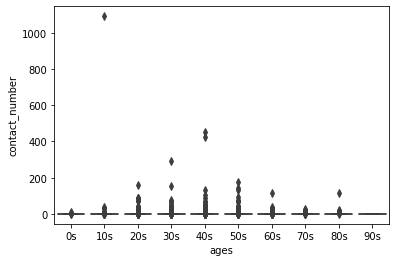

In [128]:
contact_number_stack = pd.DataFrame(contact_number.stack())

contact_number_stack.reset_index(inplace=True)
contact_number_stack.columns = ['patient_id', 'ages', 'contact_number']

sns.boxplot(x='ages', y='contact_number', data=contact_number_stack)
plt.show()

실제로 코로나19 확진자의 연령대별 접촉자 수 분포를 확인해보면 20대에서 50대의 접촉자 수가 평균적으로 많아보입니다. 부족한 데이터이기에 모든 것을 설명해주지는 않지만, **20-50대가 사람들과의 교류도 많고 활동량이 많을 것**으로 예상해볼 수 있습니다.

## **4. 날짜별 확진자 수 추이**

앞서 Time.csv 원본 데이터에 누적 신천지 관련/비관련 확진자수 데이터를 추가한 데이터프레임을 활용하여, 신천지 관련 확진 사례가 비관련 확진 사례와 비교했을 때 얼마나 빠른 확산 속도를 보이는지 확인해보았습니다.

In [132]:
#날짜별 누적 확진자 line 그래프 시각화
fig = go.Figure()
fig.add_trace(go.Line(x=time.date, y=time.nonshin, mode='lines', name='날짜별 누적 확진자 - 신천지 제외'))
fig.add_trace(go.Line(x=time.date, y=time.confirmed, mode='lines', name='날짜별 누적 확진자 - 신천지 포함'))

신천지를 포함한 날짜별 누적 확진자의 경우, 유독 급격히 확진자가 폭증한 구간이 있습니다. 2월 18일 31번째 확진자의 등장 후 검사자 수와 확진자 수가 모두 폭등했습니다.

이는 다른 감염 경로를 제외한 신천지 관련 데이터만을 가지고 시각화하면 더 뚜렷해집니다.


In [133]:
#날짜별 누적 확진자 Bar 그래프 시각화
fig = go.Figure(go.Bar(x=time.date, y=time.nonshin, name='날짜별 누적 확진자 - 신천지 제외'))
fig.add_trace(go.Bar(x=time.date, y=time.shin, name='날짜별 누적 확진자 - 신천지'))
fig.show()

눈에 띄게 폭증한 기간은 **2월 28일부터 3월 14일경**까지였습니다. 매우 가파른 증가 추세를 보입니다. 이유는 알 수 없지만, 31번 확진자로부터 감염된 신천지 교회 교인들이 2주 이내로 증상이 발현되기 시작하여 급격히 검사 수도 증가하게 된 것이 아닌가 추측해볼 수도 있을 것 같습니다. 혹은 많은 사람들이 경각심에 대거 검사를 결심한 것일 수도 있겠지요.

해당 기간 동안 비신천지 감염자와 신천지 감염자의 비율을 확인해보았습니다. 약 20일 동안 신천지 관련 감염과 그 외의 감염의 확산 속도는 실제로 얼마나 차이가 났을까요?



In [134]:
time[time.date == '2020-03-14'].shin.values-time[time.date == '2020-02-28'].shin.values / time[time.date == '2020-03-14'].nonshin.values-time[time.date == '2020-02-28'].nonshin.values

array([3518.72638436])

In [135]:
time[time.date == '2020-03-14'].nonshin.values-time[time.date == '2020-02-28'].nonshin.values

array([1573], dtype=int64)

In [136]:
4176/1573

2.6547997457088366

약 20일동안 신천지 관련 집단 감염으로 인한 확진자가 같은 기간 그렇지 않은 확진자보다 **2.65배** 가량 빠르게 확산되었다는 것을 확인할 수 있습니다. 

관련 자료([SBS 뉴스](https://news.sbs.co.kr/news/endPage.do?news_id=N1005689730&plink=COPYPASTE&cooper=SBSNEWSEND
))

얼마 전, 신천지 전수조사 이후 보건당국은 검사받은 사람 모두를 신천지 관련자와 아닌 경우로 나눈 뒤 각각 확진율을 계산했습니다. 그랬더니 신천지 관련자의 코로나19 위험도가 그렇지 않은 경우보다 2.5배 높은 것으로 나타났습니다. 1,000명씩 무작위로 검사했을 때 신천지와 관련 없는 사람은 10명 정도 양성이 나온다고 가정하면 신천지 관련자 중에는 25명이 양성이라는 뜻입니다. 이는 감염위험도로 계산했을때 60% 정도의 수치로 계산됩니다. 위에서 계산했던 2.65배의 확산속도와 방역당국이 조사한 2.5배의 확진율을 통해 신천지 관련 감염과 일반 감염의 위험성의 차이를 수치화할 수 있었습니다.

## _STEP 4. 앞으로의 감염병 사태에 대비하여 어떤 변수에 주의해야할까?_

그렇다면 STEP 3에서 시각화하여 분석한 내용을 정리하고 앞으로의 감염병 사태에는 어떻게 대비해야할지 생각해보도록 합시다.

#### **1. 확진자 주요 발생 도시 및 동선** 

신천지를 포함한 데이터에서는 경북/대구의 확진자 수가 압도적인 비율이었던 것과 달리, 신천지를 제거한 후의 데이터에서는 천안/아산, 경기도, 강남구 등 보다 다양한 지역을 찾아볼 수 있었습니다. 감염 사태에 있어 엄청난 변수였던 신천지를 제외하고서도 이렇게 많은 확진자가 발생한 것은 결국 슈퍼 전파자의 접촉 혹은 집단 감염에 의한 경우가 많았습니다.


#### **2. 주요 감염 경로 > 집단 감염**

신천지를 제외한 case 데이터를 정리한 결과, 주요 감염 경로는 해외 유입과 환자와의 접촉이었습니다. 또, 각기 다른 집단에 분포하여 '집단 감염'이라는 하나의 카테고리로 묶이지 않은 것을 감안하여 별도로 구해보니, 집단 감염의 비율도 34.3% 정도로 높은 비율을 차지하였습니다. 즉, *신천지 관련 데이터를 모두 삭제했음에도 집단 감염은 주요한 감염 경로인 것으로 나타났습니다.*

저희 팀은 **'집단 감염'도 결국은 '일 대 다 접촉'**이라는 생각에서 출발하여 단순한 가정을 하고 집단 감염이 얼마나 위험할지 계산해보았습니다. 

[홍콩의 연구 결과](https://jhealthmedia.joins.com/article/article_view.asp?pno=21627)에 따르면 감염 후 다른 사람에게 옮기는 전염력이 생길 때까지의 기간이 평균 2.5일로 조사되었다고 합니다. 이를 반영해 전염력을 가진 한 명의 보균자가 일주일에 2번 사람들을 만나는 일정을 가진다고 가정하고, 

**1)** 매번 평균 두 사람과의 소규모 만남을 가지는 경우, **2)** 일회적 집단에 한 번 방문하고 이후 소규모 모임만 가지는 경우, **3)** 정기적인 모임을 가지는 집단에 일주일에 한 번 방문하고 그 외에 소규모 모임만을 가지는 경우

로 나누어 계산해보았을 때,

**1)**의 경우 2주간 그 보균자로 인해 20명의 새로운 확진자가 발생하고, **2)**의 경우 60명, **3)**의 경우 144명의 확진자가 발생했습니다. 즉, 개인 접촉과 비교했을 때 일주일에 한 번 정기적으로 모이는 집단을 통한 집단 감염은 **약 7배** 정도의 확산성을 가질 수 있을 것으로 예상했고, 실제로 신천지 관련 데이터를 포함한 데이터에서는 집단 감염이 일반 접촉 감염의 **5.47배**로 상당히 높은 비율을 보였습니다.

이러한 집단 감염의 파급력에는 집단의 규모와 성격도 중요한 변수로 작용할 수 있을 것입니다. 한 모임에서 얼마나 많은 사람들과, 얼마나 직접적인 상호작용을 하는 집단인지에 따라 집단 내 감염률에 차이가 있을 것으로 생각되며, 신천지 교회 집단에서 여타 집단 감염 사례보다 엄청난 확산이 이루어진 것 역시 집단의 특성이 반영된 것으로 생각해볼 수 있습니다.

따라서 감염병 확산 초기에 국내의 각 집단의 특성을 반영한 방역 정책을 펼친다면, 집단 감염의 위험을 낮출 수 있을 것입니다.

#### **3. 연령대별 확진자/접촉자 수 > 20대~50대**

신천지 관련 확진자를 제외한 연령대별 확진자/접촉자 수 분석에서 20대부터 50대 사이의 확진자가 주를 이룬 것을 확인했고, 이는 평균적인 연령대별 접촉자 수와 일맥상통함으로써 결국 활동량과 교류가 많은 그 세대의 특징이 확진자 수에 영향을 주었다고 볼 수 있습니다. 

그 중에서도 특히 20대와 50대가 가장 두드러지는 수를 보였습니다. 20대가 확진자 수가 많고, 사회적 거리두기를 잘 시행하지 않는다는 것은 언론을 통해 알 수 있었지만, 50대가 20대보다 접촉자 수가 더 많은 것은 예측하지 못한 발견이었습니다. 20대와 50대의 공통점이 무엇이 있을까 찾아보던 중, ["코로나 격리해제 후 116명 '재확진' 20·50대 많아"](http://news.khan.co.kr/kh_news/khan_art_view.html?art_id=202004131427001) 해당 기사를 발견하였습니다. 정확한 원인에 대한 분석은 나와있지 않았지만, 분명 20대와 50대가 감염병 대응을 하는 것에 있어서 공통적인 부분이 있을 것이며, 이 부분에 대한 연구가 필요하다는 것을 느꼈습니다.


#### **4. 날짜별 확진자 수 추이 > 신천지가 보여준 국내 집단 내 감염의 위험성**

신천지 집단 감염이 발병하고 폭증한 구간을 분석한 데이터를 통해, 신천지 집단 감염의 확산속도는 일반 감염의 확산속도보다 2.65배 빠른 것을 알 수 있었습니다. 또, 방역당국의 조사에서 신천지 관련자의 확진율과 그렇지 않은 경우의 확진율이 2.5배 가량 차이가 난다는 것을 알 수 있었습니다. 이를 감염위험도로 계산했을때 60% 정도의 수치로 계산된다고 합니다. 신천지 집단감염의 확산속도와 확진율은 일반 감염에 비해 모두 2배 이상 높다는 사실을 통해, 폐쇄성을 띈 종교단체가 감염병 확산에 얼마나 큰 영향을 미치는 지 알 수 있습니다. 감염병 확산 초기에는, 발병지로부터 국내유입을 금지하자는 의견만이 존재했을 뿐, 감염병 확산 우려가 있는 집단에 대한 고려는 많이 이루어지지 않았습니다. 이번 신천지 집단감염 사태를 통해 추후에 있을 감염병 확산을 막기 위해서는 방역당국과 지자체에서 종교집단의 규모와 그 성격(폐쇄성)을 반영하여 더욱 세밀한 방역정책을 펼쳐야 할 것입니다.